# Avacado Project

# Prediction of Average Prices of Avocado in  United States

# Context

Avocado is a fruit consumed by people heavily in the United States. 

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

# Content

The data represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the data reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this data.

# Columns in our Dataset

index

Date: The date of the observation
    
AveragePrice: The average price of a single avocado
    
Total Volume: Total number of avocados sold
    
4046: Total number of avocados with PLU 4046 sold
    
4225: Total number of avocados with PLU 4225 sold
    
4770: Total number of avocados with PLU 4770 sold
    
Total Bags

Small Bags

Large Bags

XLarge Bags

type: conventional or organic

year: The year

region: The city or region of the observation

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing our Dataset

In [2]:
data = pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# removing unnecessary column
data = data.drop(['Unnamed: 0'],axis = 1)
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
# first 10 observations of our dataset
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
data.describe

<bound method NDFrame.describe of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  04-02-2018          1.63      17074.83  2046.96    1529.20    0.00   
18245  28-01-2018          1.71      13888.04  1191.70    3431.50    0.00   
18246  21-01-2018          1.87      13766.76  1191.92    2452.79  727.94   
18247  14-01-2018          1.93      16205.22  1527.63    2981.04  727.01   
18248  07-01-2018          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags

We are using the pandas library to read the the csv file named avocado.The file contains information on the following features: • Date - The date of the observation • AveragePrice - the average price of a single avocado • Total Volume - Total number of avocados sold • 4046 - Total number of avocados with PLU 4046 sold • 4225 - Total number of avocados with PLU 4225 sold • 4770 - Total number of avocados with PLU 4770 sold • Total Bags • Small Bags • Large Bags • XLarge Bags • type - conventional or organic • year - the year • region - the city or region of the observation

In [6]:
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !

In [7]:
# renaming column names into meaningful names
data = data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})
data

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Well as a first observation we can see that we are lucky, we dont have any missing values (18249 complete data) and 13 columns. Now let's do some Feature Engineering on the Date Feature so we can be able to use the day and the month columns in building our machine learning model later.

In [9]:
# convert the type of Date feature from obj to datetime type
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [10]:
# categorizing into several seasons
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [11]:
# creating a new feature 'season' and assign the corresponding season for the Date using map function over our season_of_date function
data['season'] = data.Date.map(season_of_date)

In [12]:
# now, we can see the season feature appended at the last
data.head(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,autumn
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,autumn
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,spring
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,autumn
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,autumn
7,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,summer
8,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,winter
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,autumn


In [13]:
# no of observations for each seasons
data.season.value_counts()

winter    4860
autumn    4536
spring    4534
summer    4319
Name: season, dtype: int64

# Data Preprocessing

In [35]:
# converting categorical features of text data into model-understandable numerical data
label_cols = ['type','region','season']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data[label_cols] = data[label_cols].apply(lambda x : label.fit_transform(x))

In [36]:
# Scaling the features and 
# spliting the label encoded features into distinct features inorder to prevent our model to think that columns have data with some kind of order or hierarchy
# column_tranformer allows us to combine several feature extraction or transformation methods into a single transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scale_cols = data.drop(['AveragePrice','type','year','region','season'],axis=1)
col_trans = make_column_transformer(
            (OneHotEncoder(), data[label_cols].columns),
            (StandardScaler(), scale_cols.columns),
            remainder = 'passthrough')

# Train Test Split

In [37]:
# splitting our dataset into train and test set such that 20% of observations are considered as test set
X = data.drop(['AveragePrice'],axis=1)
y = data.AveragePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Regression Models

# 1. Linear Regression

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
pipe = make_pipeline(col_trans,linreg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [39]:
y_pred_test = pipe.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.19940553373324274
MSE for testing set: 0.07101420411001773
RMSE for testing set: 0.26648490409405506


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

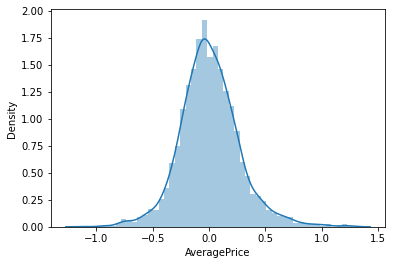

In [41]:
sns.distplot((y_test-y_pred_test),bins=50)

# 2. Support Vector Regressor (SVR)

In [42]:
from sklearn.svm import SVR
svr = SVR()
pipe = make_pipeline(col_trans,svr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('svr', SVR())])

In [43]:
y_pred_test = pipe.predict(X_test)

In [44]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.3212244072520755
MSE for testing set: 0.16307729834368825
RMSE for testing set: 0.4038283030493136


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

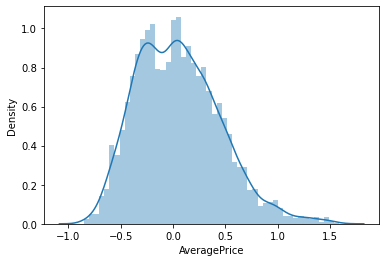

In [45]:
sns.distplot((y_test-y_pred_test),bins=50)

# 3. Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
pipe = make_pipeline(col_trans,dr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [47]:
y_pred_test = pipe.predict(X_test)

In [48]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.14603561643835616
MSE for testing set: 0.05058084931506849
RMSE for testing set: 0.22490186596617753


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

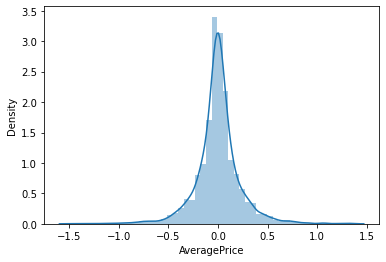

In [49]:
sns.distplot((y_test-y_pred_test),bins=50)

# 4. Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
pipe = make_pipeline(col_trans,forest_model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [51]:
y_pred_test = pipe.predict(X_test)

In [52]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.10845583561643835
MSE for testing set: 0.024154256898630135
RMSE for testing set: 0.15541639842252855


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

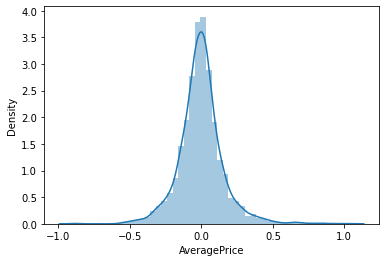

In [53]:
sns.distplot((y_test-y_pred_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.


RandomForestRegressor overperfomed LinearRegression, SVR and DecisionTreeRegressor with an RMSE of 0.147.

We can increase the performance to some more extent by tweaking the parameters of the models (especially for the models like RandomForestRegressor and DecisionTreeRegressor) and can use hyperparameter tuning techniques such as GridSearchCV and RandomizedSearchCV to find out the best parameters for our models!

# Analysis of Average Prices

Text(0.5, 1.0, 'Average Price')

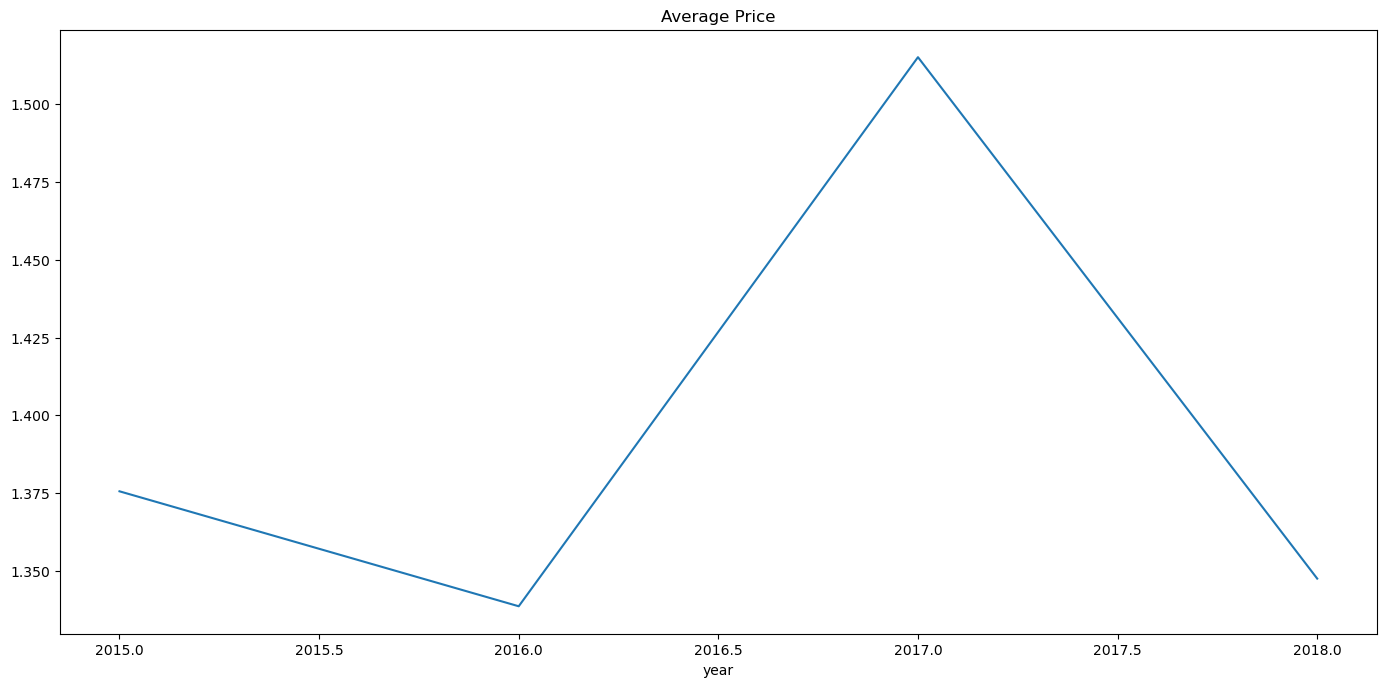

In [56]:
import matplotlib.pyplot as plt

byDate=data.groupby('year').mean()
plt.figure(figsize=(17,8),dpi=100)
byDate['AveragePrice'].plot()
plt.title('Average Price')

Hence the plot shows the average price of avocado at various points of time

Text(0.5, 1.0, 'Average Price According to Region')

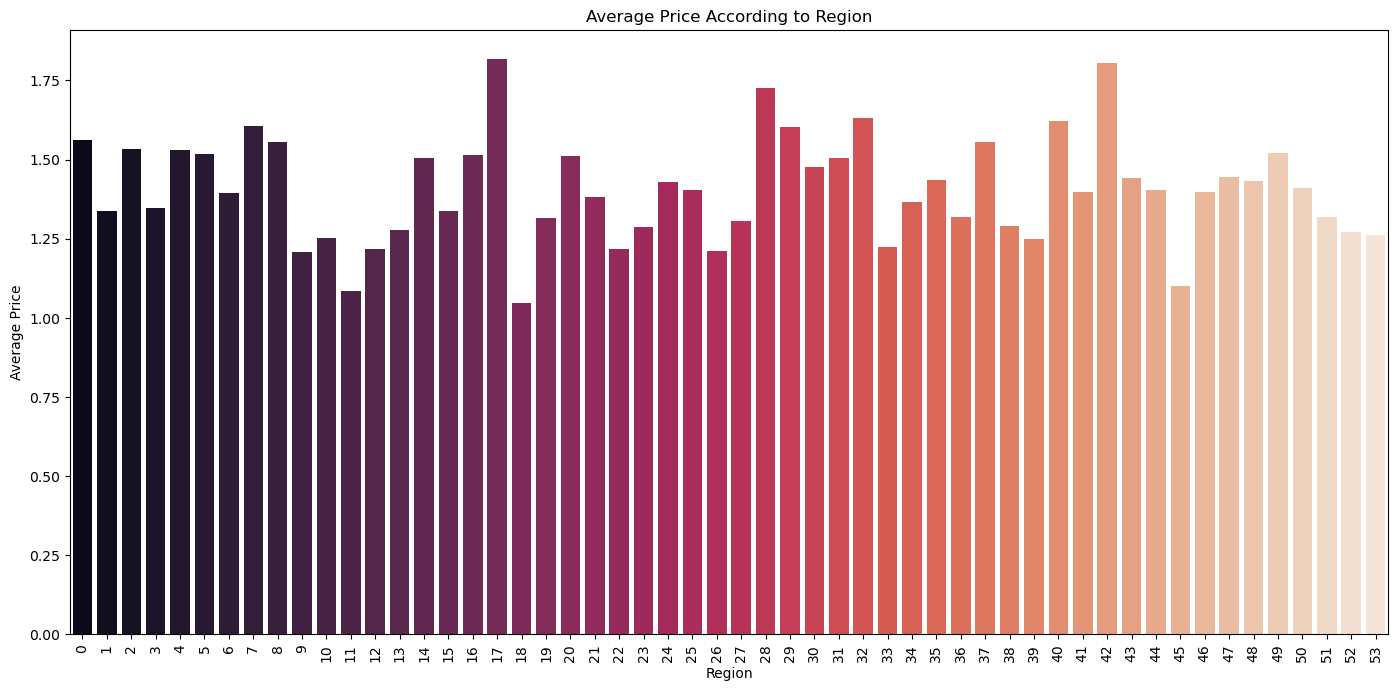

In [57]:
import seaborn as sns

byRegion=data.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

The barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

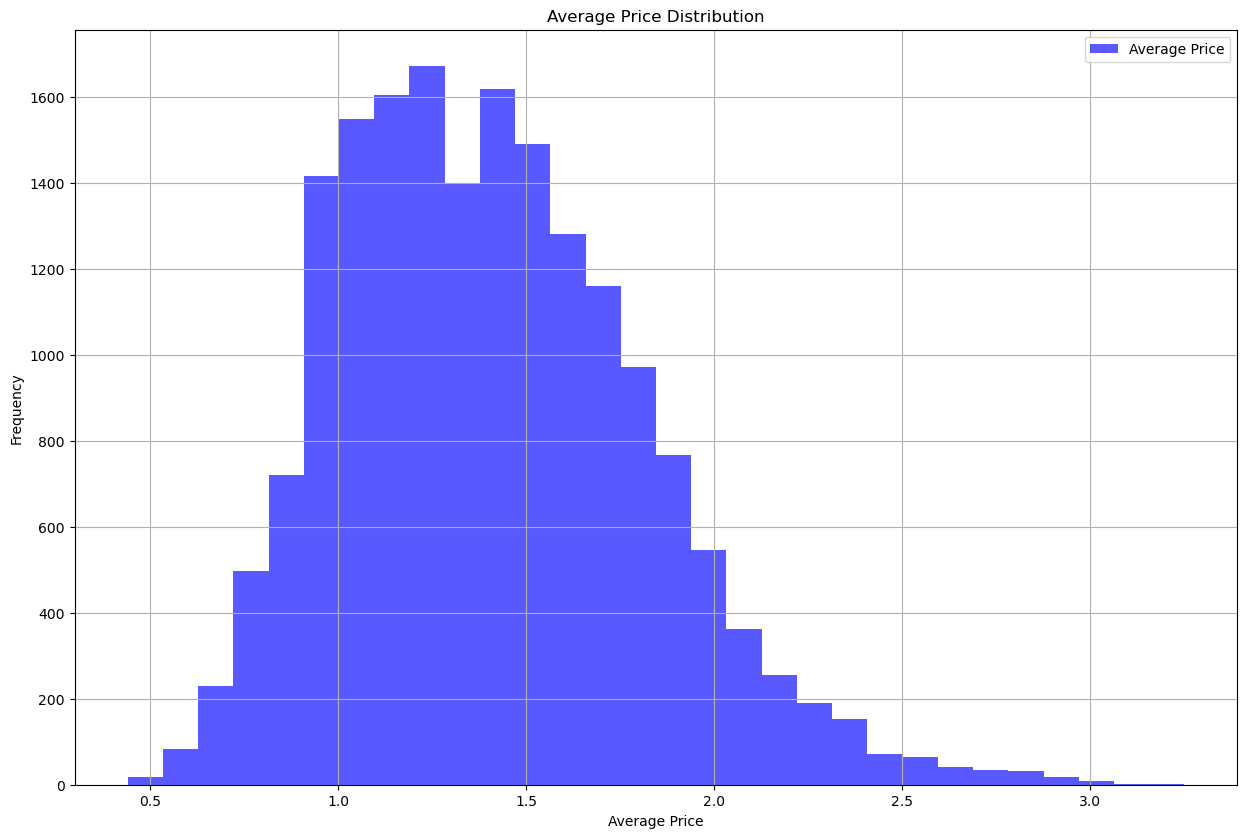

In [58]:
plt.figure(figsize=(15,10),dpi=100)
data["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

The above histogram for the average price of avocado suggests that its distribution is somewhat positively skewed.

<AxesSubplot:>

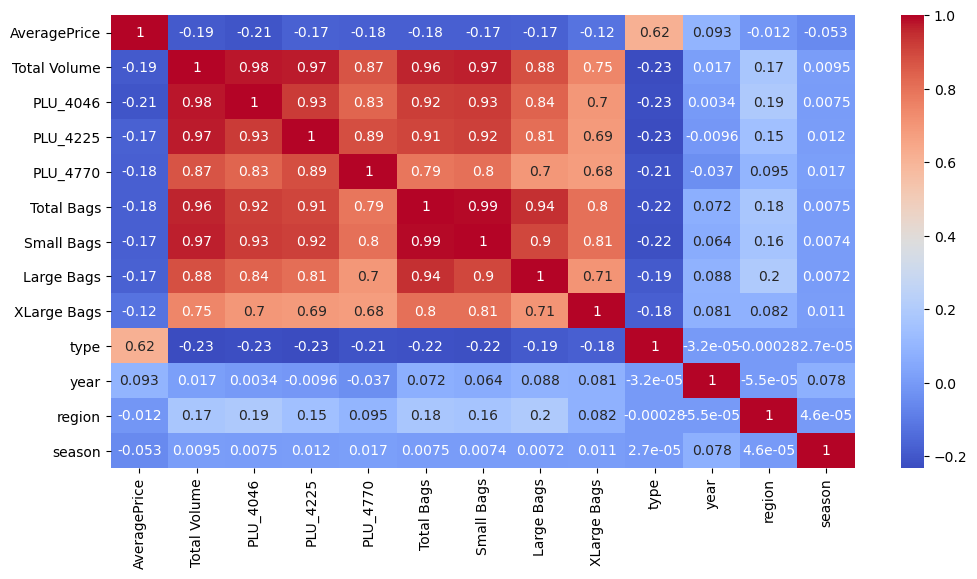

In [59]:
import numpy as np

corr_df = data.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other.

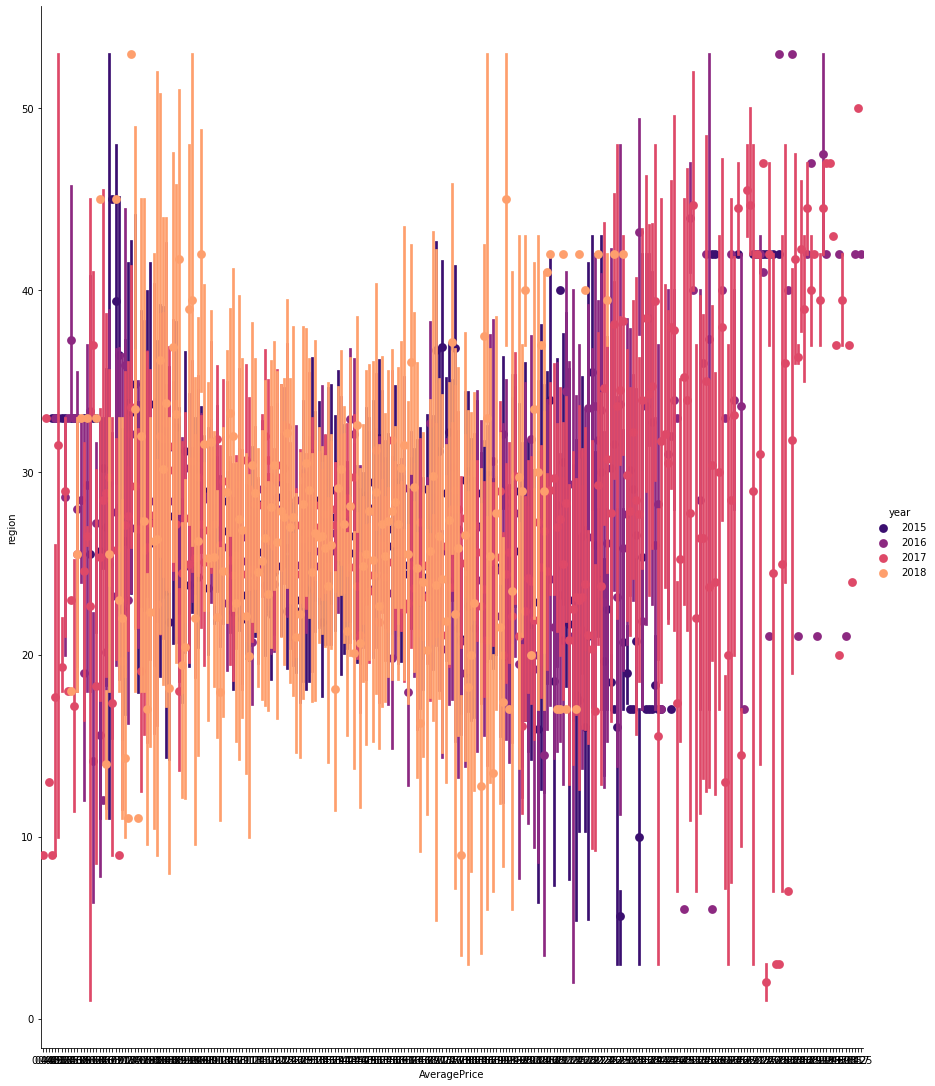

In [60]:
sns.factorplot('AveragePrice','region',data=data,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page. The underlying plot generated can be any univariate or bivariate plot. The scatter plot is the most common application. The above plot is a factor plot of average avocado price for different regions classified by year.

In [62]:
data_vif = data.copy()
data_vif.drop(columns=['year','type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(data_vif)
pd.Series([variance_inflation_factor(Xf.values, i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           1.659749e+01
AveragePrice    1.057338e+00
Total Volume    4.907224e+09
PLU_4046        6.583785e+08
PLU_4225        5.965443e+08
PLU_4770        4.751608e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.620949e+10
season          1.003392e+00
dtype: float64

The above code snippet calculates the variable inflation factor for the displayed variables.

# Taking Care of the Outliers

<AxesSubplot:>

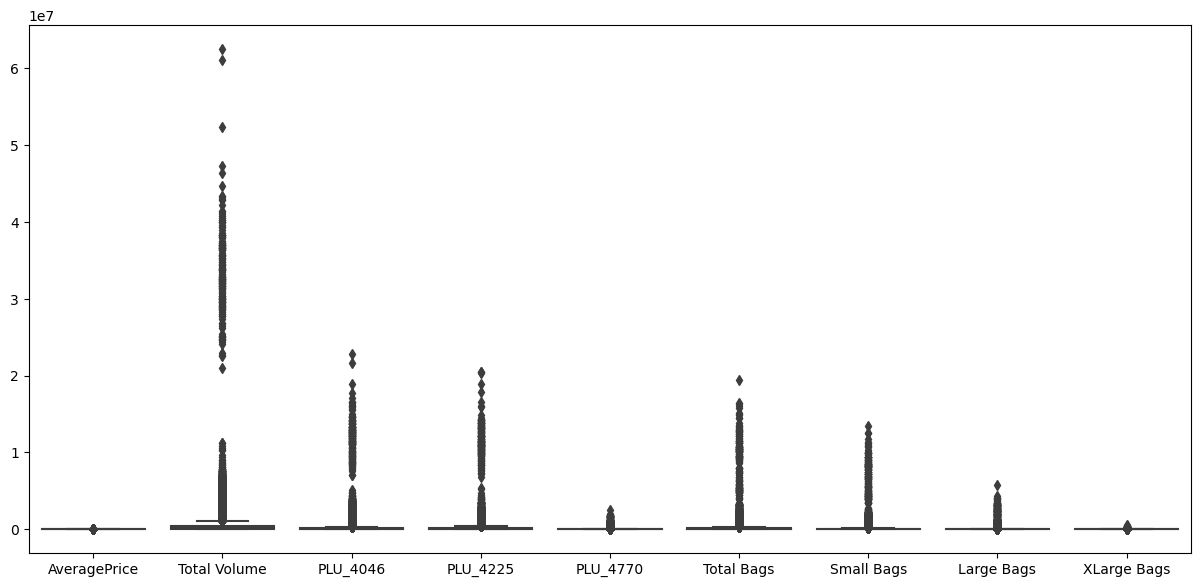

In [63]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[[
 'AveragePrice',
 'Total Volume',
 'PLU_4046',
 'PLU_4225',
 'PLU_4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

Clearly the boxplot indicates that all the variables contains outliers. Now we need to take care of the outliers.

In [64]:
import numpy as np
from numpy import percentile

columns = data.columns
for j in columns:
    if isinstance(data[j][0], str) :
        continue
    else:
        for i in range(len(data)):
            #defining quartiles
            quartiles = percentile(data[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if data[j][i] > upper_fence:
                data[j][i] = upper_fence
            elif data[j][i] < lower_fence:
                data[j][i] = lower_fence

In the following code snippet we have we replaced the outliers higer than the upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker.

In [65]:
data.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,0


<AxesSubplot:>

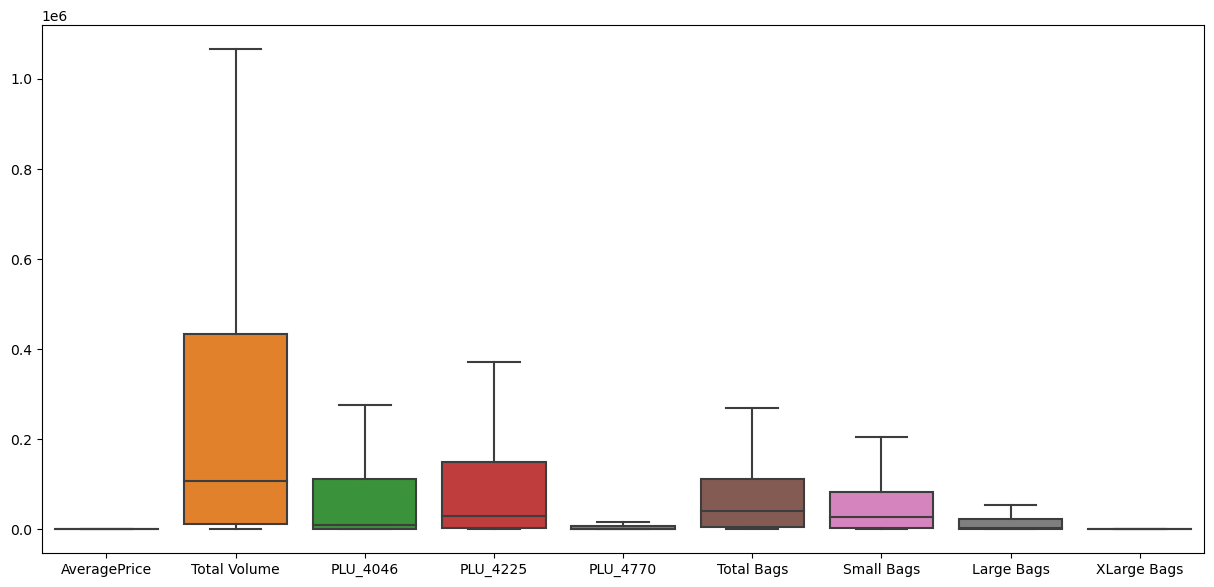

In [66]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[[
 'AveragePrice',
 'Total Volume',
 'PLU_4046',
 'PLU_4225',
 'PLU_4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

# Taking Care of the Categorical Variables

Now since our data contains categorical variables like "type", "month" and "region" we apply one-hot encoding to our variables "region","month" and apply label encoding in variable "type


One hot encoding creates equal number of columns, with 1's and 0's, as the number of categories in a categorical variable a column for a specific category contains 1's where the category is present and 0's elsewhere.


As for label encoding it asssigns numerical value to the categories of a categorical variable in their alphabetical order, the indexing starts with 0.


OneHotEncoder in Python can encode a specific number of categories since for the variable 'region' we have crossed that threshold we have used pandas.get_dummies instead. Had we use OneHotEncoder we would have eliminated one column to avoid dummy variable trap but here we have no use for that.


dataset['region'] = pd.Categorical(dataset['region'])

In [67]:
data['region'] = pd.Categorical(data['region'])
dfDummies_region = pd.get_dummies(data['region'], prefix = 'region')
dfDummies_region

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,...,region_44,region_45,region_46,region_47,region_48,region_49,region_50,region_51,region_52,region_53
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
